Familiaritza't amb la programació científica mitjantçant la llibreria SKLearn / Scikitlearn.

- Objectius:
Preprocesament,
Transformació,
Dummy Variable i
Train i Test

### Nivell 1

#### Exercici 1
Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import iqr

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
df = pd.read_csv('DelayedFlights.csv')
df

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  CRSArrTime UniqueCarrier  FlightNum TailNum  ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  Distance  TaxiIn  TaxiOut  Cancelled CancellationCode  Diverted  CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay
0                 0  2008      1           3          4   2003.0        1955   2211.0        2225            WN        335  N712SW              128.0           150.0    116.0     -14.0       8.0    IAD  TPA       810     4.0      8.0          0                N         0           NaN           NaN       NaN            NaN                NaN
1                 1  2008      1           3          4    754.0         735   1002.0        1000            WN       3231  N772SW              128.0           145.0    113.0       2.0      19.0    IAD  TPA       810     5.0     10.0          0                N         0           NaN           NaN       NaN            NaN                NaN
2                 2  2008      1           3          4    628.0         620    804.0         750            WN        448  N428WN               96.0            90.0     76.0      14.0       8.0    IND  BWI       515     3.0     17.0          0                N         0           NaN           NaN       NaN            NaN                NaN
3                 4  2008      1           3          4   1829.0        1755   1959.0        1925            WN       3920  N464WN               90.0            90.0     77.0      34.0      34.0    IND  BWI       515     3.0     10.0          0                N         0           2.0           0.0       0.0            0.0               32.0
4                 5  2008      1           3          4   1940.0        1915   2121.0        2110            WN        378  N726SW              101.0           115.0     87.0      11.0      25.0    IND  JAX       688     4.0     10.0          0                N         0           NaN           NaN       NaN            NaN                NaN
...             ...   ...    ...         ...        ...      ...         ...      ...         ...           ...        ...     ...                ...             ...      ...       ...       ...    ...  ...       ...     ...      ...        ...              ...       ...           ...           ...       ...            ...                ...
1936753     7009710  2008     12          13          6   1250.0        1220   1617.0        1552            DL       1621  N938DL              147.0           152.0    120.0      25.0      30.0    MSP  ATL       906     9.0     18.0          0                N         0           3.0           0.0       0.0            0.0               22.0
1936754     7009717  2008     12          13          6    657.0         600    904.0         749            DL       1631  N3743H              127.0           109.0     78.0      75.0      57.0    RIC  ATL       481    15.0     34.0          0                N         0           0.0          57.0      18.0            0.0                0.0
1936755     7009718  2008     12          13          6   1007.0         847   1149.0        1010            DL       1631  N909DA              162.0           143.0    122.0      99.0      80.0    ATL  IAH       689     8.0     32.0          0                N         0           1.0           0.0      19.0            0.0               79.0
1936756     7009726  2008     12          13          6   1251.0        1240   1446.0        1437            DL       1639  N646DL              115.0           117.0     89.0       9.0      11.0    IAD  ATL       533    13.0     13.0          0                N         0           NaN           NaN       NaN            NaN                NaN
1936757     7009727  2008     12          13          6   1110.0        1103   1413.0        1418            DL       1641  N908DL              123.0           135.0    104.0      -5.0       7.0    SAT  ATL       874     8.0 

In [3]:
df.corr()

Unnamed: 0  Year     Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime   ArrTime  CRSArrTime  FlightNum  ActualElapsedTime  CRSElapsedTime   AirTime  ArrDelay  DepDelay  Distance    TaxiIn   TaxiOut  Cancelled  Diverted  CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay
Unnamed: 0           1.000000   NaN  0.996163    0.055479  -0.000094 -0.009365   -0.012203 -0.000092    0.002347  -0.018826           0.025926        0.029418  0.021031  0.002571  0.006899  0.026011  0.033385  0.017770   0.028348  0.006663      0.003528      0.005581  0.017511      -0.003797           0.001457
Year                      NaN   NaN       NaN         NaN        NaN       NaN         NaN       NaN         NaN        NaN                NaN             NaN       NaN       NaN       NaN       NaN       NaN       NaN        NaN       NaN           NaN           NaN       NaN            NaN                NaN
Month                0.996163   NaN  1.000000    0.059651   0.000088 -0.007809   -0.011367  0.001014    0.001367  -0.000188           0.002684        0.007046  0.000860 -0.000897  0.004769  0.005498  0.019705  0.002574   0.028837  0.006467      0.000420      0.006611  0.011441      -0.003066           0.004953
DayofMonth           0.055479   NaN  0.059651    1.000000   0.017476  0.001014    0.001019  0.000833    0.000758  -0.005912          -0.000880       -0.000028 -0.000244  0.004129  0.005289  0.000117 -0.002926 -0.002201   0.004671  0.001190     -0.000947      0.000916  0.005644      -0.000308           0.009100
DayOfWeek           -0.000094   NaN  0.000088    0.017476   1.000000  0.021924    0.027039  0.010913    0.017750  -0.009769           0.003072        0.004954  0.004738  0.006123  0.008538  0.008138  0.008516 -0.010302   0.000023 -0.001361      0.010215      0.005654 -0.006628       0.004665           0.008839
DepTime             -0.009365   NaN -0.007809    0.001014   0.021924  1.000000    0.881598  0.458934    0.711513  -0.024786          -0.047040       -0.044619 -0.054831  0.127017  0.139254 -0.056003 -0.012023  0.030481   0.002280 -0.004632     -0.051948      0.005307  0.022530      -0.015273           0.169453
CRSDepTime          -0.012203   NaN -0.011367    0.001019   0.027039  0.881598    1.000000  0.396724    0.710303  -0.054808          -0.034925       -0.026388 -0.036582  0.044447  0.058875 -0.029517 -0.032379  0.011408   0.000023 -0.009096     -0.107337     -0.009338 -0.032701      -0.017064           0.167734
ArrTime             -0.000092   NaN  0.001014    0.000833   0.010913  0.458934    0.396724  1.000000    0.619385  -0.013665          -0.013595       -0.012911 -0.017684 -0.050948 -0.053024 -0.027751  0.039818  0.001430        NaN -0.007204     -0.083981     -0.029860  0.032395      -0.007417          -0.037949
CRSArrTime           0.002347   NaN  0.001367    0.000758   0.017750  0.711513    0.710303  0.619385    1.000000  -0.060006           0.033203        0.040117  0.025907  0.043078  0.053706  0.024335  0.013819  0.037942   0.000201  0.000907     -0.096156     -0.005033  0.009227      -0.013349           0.131467
FlightNum           -0.018826   NaN -0.000188   -0.005912  -0.009769 -0.024786   -0.054808 -0.013665   -0.060006   1.000000          -0.322283       -0.335956 -0.341250  0.061266  0.051852 -0.356770 -0.003918  0.015524   0.009147 -0.002885      0.055712      0.067488  0.015405      -0.002809          -0.052708
ActualElapsedTime    0.025926   NaN  0.002684   -0.000880   0.003072 -0.047040   -0.034925 -0.013595    0.033203  -0.322283           1.000000        0.971122  0.976660  0.068130  0.018492  0.952980  0.166348  0.289568        NaN       NaN      0.009962      0.004066  0.177135       0.005720          -0.034204
CRSElapsedTime       0.029418   NaN  0.007046   -0.000028   0.004954 -0.044619   -0.026388 -0.012911    0.040117  -0.335956           0.971122        1.000000  0.986086 -0.015676  0.007001  0.981759  0.099646  0.123839  -0.003916  0.024660      0.026586     -0.016478  0.0469

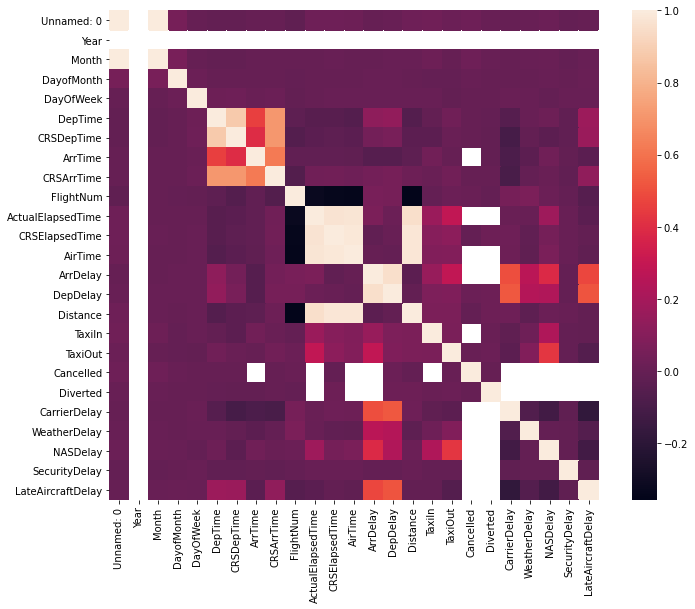

In [4]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

In [5]:
# Busquem quines variables estan correlacionades amb la variable 'Arrival Delay' abans del pre-processament,
# per fer la selecció de features:
df[df.columns].corr()['ArrDelay']

Unnamed: 0           0.002571
Year                      NaN
Month               -0.000897
DayofMonth           0.004129
DayOfWeek            0.006123
DepTime              0.127017
CRSDepTime           0.044447
ArrTime             -0.050948
CRSArrTime           0.043078
FlightNum            0.061266
ActualElapsedTime    0.068130
CRSElapsedTime      -0.015676
AirTime             -0.000189
ArrDelay             1.000000
DepDelay             0.952927
Distance            -0.029853
TaxiIn               0.156277
TaxiOut              0.286484
Cancelled                 NaN
Diverted                  NaN
CarrierDelay         0.501773
WeatherDelay         0.264624
NASDelay             0.387606
SecurityDelay       -0.002488
LateAircraftDelay    0.478123
Name: ArrDelay, dtype: float64

In [6]:
# Partim el df en train i test
X_train, X_test = train_test_split(df, test_size = 0.2)

In [7]:
X_train.describe()

Unnamed: 0       Year         Month    DayofMonth     DayOfWeek       DepTime    CRSDepTime       ArrTime    CRSArrTime     FlightNum  ActualElapsedTime  CRSElapsedTime       AirTime      ArrDelay      DepDelay      Distance        TaxiIn       TaxiOut     Cancelled      Diverted   CarrierDelay   WeatherDelay       NASDelay  SecurityDelay  LateAircraftDelay
count  1.549406e+06  1549406.0  1.549406e+06  1.549406e+06  1.549406e+06  1.549406e+06  1.549406e+06  1.543731e+06  1.549406e+06  1.549406e+06       1.542703e+06    1.549253e+06  1.542703e+06  1.542703e+06  1.549406e+06  1.549406e+06  1.543731e+06  1.549028e+06  1.549406e+06  1.549406e+06  997996.000000  997996.000000  997996.000000  997996.000000      997996.000000
mean   3.340423e+06     2008.0  6.109084e+00  1.575259e+01  3.985556e+00  1.518222e+03  1.467079e+03  1.609936e+03  1.633945e+03  2.184567e+03       1.333418e+02    1.343423e+02  1.083177e+02  4.218634e+01  4.317803e+01  7.659721e+02  6.814047e+00  1.822637e+01  3.369033e-04  3.989271e-03      19.170231       3.702283      15.021437       0.091208          25.284393
std    2.065931e+06        0.0  3.482344e+00  8.774972e+00  1.995942e+00  4.504485e+02  4.247913e+02  5.480709e+02  4.646469e+02  1.944930e+03       7.208880e+01    7.136763e+01  6.867175e+01  5.672693e+01  5.335388e+01  5.747074e+02  5.275380e+00  1.433354e+01  1.835184e-02  6.303459e-02      43.495061      21.502606      33.873476       2.035521          41.976183
min    0.000000e+00     2008.0  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00       1.400000e+01   -2.500000e+01  0.000000e+00 -1.090000e+02  6.000000e+00  1.100000e+01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000       0.000000       0.000000       0.000000           0.000000
25%    1.516474e+06     2008.0  3.000000e+00  8.000000e+00  2.000000e+00  1.203000e+03  1.135000e+03  1.316000e+03  1.325000e+03  6.100000e+02       8.000000e+01    8.200000e+01  5.800000e+01  9.000000e+00  1.200000e+01  3.380000e+02  4.000000e+00  1.000000e+01  0.000000e+00  0.000000e+00       0.000000       0.000000       0.000000       0.000000           0.000000
50%    3.242022e+06     2008.0  6.000000e+00  1.600000e+01  4.000000e+00  1.545000e+03  1.510000e+03  1.715000e+03  1.705000e+03  1.543000e+03       1.160000e+02    1.160000e+02  9.000000e+01  2.400000e+01  2.400000e+01  6.060000e+02  6.000000e+00  1.400000e+01  0.000000e+00  0.000000e+00       2.000000       0.000000       2.000000       0.000000           8.000000
75%    4.969253e+06     2008.0  9.000000e+00  2.300000e+01  6.000000e+00  1.900000e+03  1.815000e+03  2.030000e+03  2.014000e+03  3.424000e+03       1.650000e+02    1.650000e+02  1.370000e+02  5.600000e+01  5.300000e+01  9.980000e+02  8.000000e+00  2.100000e+01  0.000000e+00  0.000000e+00      21.000000       0.000000      15.000000       0.000000          33.000000
max    7.009727e+06     2008.0  1.200000e+01  3.100000e+01  7.000000e+00  2.400000e+03  2.359000e+03  2.400000e+03  2.400000e+03  9.742000e+03       1.114000e+03    6.600000e+02  1.091000e+03  2.461000e+03  2.467000e+03  4.962000e+03  2.400000e+02  4.220000e+02  1.000000e+00  1.000000e+00    2436.000000    1352.000000    1357.000000     392.000000        1303.000000

In [8]:
X_test.describe()

Unnamed: 0      Year          Month     DayofMonth      DayOfWeek        DepTime     CRSDepTime        ArrTime     CRSArrTime      FlightNum  ActualElapsedTime  CRSElapsedTime        AirTime       ArrDelay       DepDelay       Distance         TaxiIn        TaxiOut      Cancelled       Diverted   CarrierDelay   WeatherDelay       NASDelay  SecurityDelay  LateAircraftDelay
count  3.873520e+05  387352.0  387352.000000  387352.000000  387352.000000  387352.000000  387352.000000  385917.000000  387352.000000  387352.000000      385668.000000   387307.000000  385668.000000  385668.000000  387352.000000  387352.000000  385917.000000  387275.000000  387352.000000  387352.000000  249492.000000  249492.000000  249492.000000  249492.000000      249492.000000
mean   3.346564e+06    2008.0       6.119196      15.757004       3.981911    1519.783166    1469.049002    1610.959717    1635.343569    2183.048721         133.162010      134.144578     108.114752      42.254055      43.213769     764.542556       6.808689      18.255524       0.000287       0.004061      19.216071       3.708720      15.022430       0.085854          25.344761
std    2.066596e+06       0.0       3.483349       8.781483       1.996064     450.630505     424.665844     548.606704     464.584776    1943.794594          71.944928       71.236436      68.525766      57.015321      53.596597     573.567122       5.266452      14.358507       0.016926       0.063596      43.750268      21.454075      33.670934       1.970650          42.368174
min    1.000000e+00    2008.0       1.000000       1.000000       1.000000       1.000000       1.000000       1.000000       1.000000       1.000000          15.000000        1.000000       0.000000     -66.000000       6.000000      30.000000       0.000000       0.000000       0.000000       0.000000       0.000000       0.000000       0.000000       0.000000           0.000000
25%    1.521219e+06    2008.0       3.000000       8.000000       2.000000    1204.000000    1135.000000    1316.000000    1325.000000     612.000000          80.000000       82.000000      58.000000       9.000000      12.000000     338.000000       4.000000      10.000000       0.000000       0.000000       0.000000       0.000000       0.000000       0.000000           0.000000
50%    3.244582e+06    2008.0       6.000000      16.000000       4.000000    1546.000000    1510.000000    1717.000000    1707.000000    1544.000000         116.000000      116.000000      90.000000      24.000000      24.000000     607.000000       6.000000      14.000000       0.000000       0.000000       2.000000       0.000000       2.000000       0.000000           8.000000
75%    4.983013e+06    2008.0       9.000000      23.000000       6.000000    1901.000000    1819.000000    2031.000000    2015.000000    3415.000000         165.000000      165.000000     137.000000      56.000000      53.000000     994.000000       8.000000      21.000000       0.000000       0.000000      21.000000       0.000000      15.000000       0.000000          33.000000
max    7.009683e+06    2008.0      12.000000      31.000000       7.000000    2400.000000    2359.000000    2400.000000    2400.000000    9741.000000         697.000000      660.000000     664.000000    1395.000000    1403.000000    4962.000000     199.000000     393.000000       1.000000       1.000000    1292.000000    1297.000000    1207.000000     284.000000        1316.000000

Podem observar que les descripcions estadístiques del train i test són gairebé idèntiques

### Nivell 2

#### Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [9]:
# Transformem la variable categòrica 'UniqueCarrier' amb dummies:
dummy_carriers = pd.get_dummies(df['UniqueCarrier'], prefix='carr')
df = pd.concat([df, dummy_carriers], axis=1)
df

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  CRSArrTime UniqueCarrier  FlightNum TailNum  ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  Distance  TaxiIn  TaxiOut  Cancelled CancellationCode  Diverted  CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  carr_9E  carr_AA  carr_AQ  carr_AS  carr_B6  carr_CO  carr_DL  carr_EV  carr_F9  carr_FL  carr_HA  carr_MQ  carr_NW  carr_OH  carr_OO  carr_UA  carr_US  carr_WN  carr_XE  carr_YV
0                 0  2008      1           3          4   2003.0        1955   2211.0        2225            WN        335  N712SW              128.0           150.0    116.0     -14.0       8.0    IAD  TPA       810     4.0      8.0          0                N         0           NaN           NaN       NaN            NaN                NaN        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0
1                 1  2008      1           3          4    754.0         735   1002.0        1000            WN       3231  N772SW              128.0           145.0    113.0       2.0      19.0    IAD  TPA       810     5.0     10.0          0                N         0           NaN           NaN       NaN            NaN                NaN        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0
2                 2  2008      1           3          4    628.0         620    804.0         750            WN        448  N428WN               96.0            90.0     76.0      14.0       8.0    IND  BWI       515     3.0     17.0          0                N         0           NaN           NaN       NaN            NaN                NaN        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0
3                 4  2008      1           3          4   1829.0        1755   1959.0        1925            WN       3920  N464WN               90.0            90.0     77.0      34.0      34.0    IND  BWI       515     3.0     10.0          0                N         0           2.0           0.0       0.0            0.0               32.0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0
4                 5  2008      1           3          4   1940.0        1915   2121.0        2110            WN        378  N726SW              101.0           115.0     87.0      11.0      25.0    IND  JAX       688     4.0     10.0          0                N         0           NaN           NaN       NaN            NaN                NaN        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0
...             ...   ...    ...         ...        ...      ...         ...      ...         ...           ...        ...     ...                ...             ...      ...       ...       ...    ...  ...       ...     ...      ...        ...              ...       ...           ...           ...       ...            ...                ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...
1936753     7009710  2008     12          13          6   1250.0        1220   1617.0        1552            DL       1621  N938DL              147.0           152.0    120.0      25.0      30.0    MSP  ATL       906     9.0     18.0          0                N         0           3.0           0.0       0.0            0.0               22

In [10]:
# dummy_cancel = pd.get_dummies(df["CancellationCode"], prefix='cancel')
# df = pd.concat([df, dummy_cancel], axis=1)

In [11]:
# dummy_origin = pd.get_dummies(df["Origin"], prefix='org')
# df = pd.concat([df, dummy_origin], axis=1)

In [12]:
# dummy_dest = pd.get_dummies(df["Dest"], prefix='dest')
# df = pd.concat([df, dummy_dest], axis=1)
# df

In [13]:
# Passem les 3 columnes: any, mes i dia, a una sola amb format data:
df['DepDate'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')

In [14]:
df['DepDate']

0         2008-01-03
1         2008-01-03
2         2008-01-03
3         2008-01-03
4         2008-01-03
             ...    
1936753   2008-12-13
1936754   2008-12-13
1936755   2008-12-13
1936756   2008-12-13
1936757   2008-12-13
Name: DepDate, Length: 1936758, dtype: datetime64[ns]

In [15]:
#Columna de la velocitat mitjana de vol en milles per hora
df['medium_mph'] = df['Distance']/ (df['AirTime']/60)
print(df['medium_mph'])

0          418.965517
1          430.088496
2          406.578947
3          401.298701
4          474.482759
              ...    
1936753    453.000000
1936754    370.000000
1936755    338.852459
1936756    359.325843
1936757    504.230769
Name: medium_mph, Length: 1936758, dtype: float64


In [16]:
#Columna de temps d'endarreriment i els vols més endarrerits
df['temps_delay'] = df['CarrierDelay'] + df['WeatherDelay'] + df['NASDelay'] + df['SecurityDelay'] + df['LateAircraftDelay']
mes_endarrerits = (df.groupby('FlightNum')['temps_delay'].size())
mes_endarrerits.sort_values(ascending=False).head(10)

FlightNum
16     1586
50     1550
40     1507
15     1471
44     1447
52     1410
62     1375
47     1362
321    1355
75     1354
Name: temps_delay, dtype: int64

In [17]:
#Columna dels vols endarrerits com a booleà, passat a 'Yes'/'No'
df['Delayed'] = df[['CarrierDelay','WeatherDelay', 'NASDelay','SecurityDelay','LateAircraftDelay']].sum(axis=1)>0
bool_cols = df.columns[df.dtypes == 'bool']
df[bool_cols] = df[bool_cols].replace({True: 'Yes', False: 'No'})

In [18]:
dummy_delayed = pd.get_dummies(df['Delayed'], prefix='del')
df = pd.concat([df, dummy_delayed], axis=1)

In [19]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'carr_9E', 'carr_AA', 'carr_AQ', 'carr_AS', 'carr_B6', 'carr_CO', 'carr_DL', 'carr_EV', 'carr_F9', 'carr_FL', 'carr_HA', 'carr_MQ', 'carr_NW', 'carr_OH', 'carr_OO', 'carr_UA', 'carr_US', 'carr_WN', 'carr_XE', 'carr_YV', 'DepDate', 'medium_mph', 'temps_delay', 'Delayed', 'del_No', 'del_Yes'], dtype='object')

In [20]:
df

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  CRSArrTime UniqueCarrier  FlightNum TailNum  ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  Distance  TaxiIn  TaxiOut  Cancelled CancellationCode  Diverted  CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  carr_9E  carr_AA  carr_AQ  carr_AS  carr_B6  carr_CO  carr_DL  carr_EV  carr_F9  carr_FL  carr_HA  carr_MQ  carr_NW  carr_OH  carr_OO  carr_UA  carr_US  carr_WN  carr_XE  carr_YV    DepDate  medium_mph  temps_delay Delayed  del_No  del_Yes
0                 0  2008      1           3          4   2003.0        1955   2211.0        2225            WN        335  N712SW              128.0           150.0    116.0     -14.0       8.0    IAD  TPA       810     4.0      8.0          0                N         0           NaN           NaN       NaN            NaN                NaN        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0 2008-01-03  418.965517          NaN      No       1        0
1                 1  2008      1           3          4    754.0         735   1002.0        1000            WN       3231  N772SW              128.0           145.0    113.0       2.0      19.0    IAD  TPA       810     5.0     10.0          0                N         0           NaN           NaN       NaN            NaN                NaN        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0 2008-01-03  430.088496          NaN      No       1        0
2                 2  2008      1           3          4    628.0         620    804.0         750            WN        448  N428WN               96.0            90.0     76.0      14.0       8.0    IND  BWI       515     3.0     17.0          0                N         0           NaN           NaN       NaN            NaN                NaN        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0 2008-01-03  406.578947          NaN      No       1        0
3                 4  2008      1           3          4   1829.0        1755   1959.0        1925            WN       3920  N464WN               90.0            90.0     77.0      34.0      34.0    IND  BWI       515     3.0     10.0          0                N         0           2.0           0.0       0.0            0.0               32.0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0 2008-01-03  401.298701         34.0     Yes       0        1
4                 5  2008      1           3          4   1940.0        1915   2121.0        2110            WN        378  N726SW              101.0           115.0     87.0      11.0      25.0    IND  JAX       688     4.0     10.0          0                N         0           NaN           NaN       NaN            NaN                NaN        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0 2008-01-03  474.482759          NaN      No       1        0
...             ...   ...    ...         ...        ...      ...         ...      ...         ...           ...        ...     ...                ...             ...      ...       ...       ...    ...  ...       ...     ...      ...        ...              ...       ...           ...           ...       ...            ...                ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...   

In [21]:
first_col = df.pop('DepDate')
df.insert(0, 'DepDate', first_col)

In [22]:
df["CancellationCode"].value_counts()

N    1936125
B        307
A        246
C         80
Name: CancellationCode, dtype: int64

In [23]:
# Fem un dummie de la variable cancel·lació:
dummy_cancel = pd.get_dummies(df["CancellationCode"], prefix='cancel')
df = pd.concat([df, dummy_cancel], axis=1)
df

DepDate  Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  CRSArrTime UniqueCarrier  FlightNum TailNum  ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  Distance  TaxiIn  TaxiOut  Cancelled CancellationCode  Diverted  CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  carr_9E  carr_AA  carr_AQ  carr_AS  carr_B6  carr_CO  carr_DL  carr_EV  carr_F9  carr_FL  carr_HA  carr_MQ  carr_NW  carr_OH  carr_OO  carr_UA  carr_US  carr_WN  carr_XE  carr_YV  medium_mph  temps_delay Delayed  del_No  del_Yes  cancel_A  cancel_B  cancel_C  cancel_N
0       2008-01-03           0  2008      1           3          4   2003.0        1955   2211.0        2225            WN        335  N712SW              128.0           150.0    116.0     -14.0       8.0    IAD  TPA       810     4.0      8.0          0                N         0           NaN           NaN       NaN            NaN                NaN        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0  418.965517          NaN      No       1        0         0         0         0         1
1       2008-01-03           1  2008      1           3          4    754.0         735   1002.0        1000            WN       3231  N772SW              128.0           145.0    113.0       2.0      19.0    IAD  TPA       810     5.0     10.0          0                N         0           NaN           NaN       NaN            NaN                NaN        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0  430.088496          NaN      No       1        0         0         0         0         1
2       2008-01-03           2  2008      1           3          4    628.0         620    804.0         750            WN        448  N428WN               96.0            90.0     76.0      14.0       8.0    IND  BWI       515     3.0     17.0          0                N         0           NaN           NaN       NaN            NaN                NaN        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0  406.578947          NaN      No       1        0         0         0         0         1
3       2008-01-03           4  2008      1           3          4   1829.0        1755   1959.0        1925            WN       3920  N464WN               90.0            90.0     77.0      34.0      34.0    IND  BWI       515     3.0     10.0          0                N         0           2.0           0.0       0.0            0.0               32.0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0  401.298701         34.0     Yes       0        1         0         0         0         1
4       2008-01-03           5  2008      1           3          4   1940.0        1915   2121.0        2110            WN        378  N726SW              101.0           115.0     87.0      11.0      25.0    IND  JAX       688     4.0     10.0          0                N         0           NaN           NaN       NaN            NaN                NaN        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0  474.482759          NaN      No       1        0         0         0         0         1
...            ...         ...   ...    ...         ...        ...      ...         ...      ...         ...           ...        ...     ...                ...             ...      ...       ...       ...    ...  ...       ...     ...      ...        ...      

In [24]:
df.dtypes

DepDate              datetime64[ns]
Unnamed: 0                    int64
Year                          int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
DepTime                     float64
CRSDepTime                    int64
ArrTime                     float64
CRSArrTime                    int64
UniqueCarrier                object
FlightNum                     int64
TailNum                      object
ActualElapsedTime           float64
CRSElapsedTime              float64
AirTime                     float64
ArrDelay                    float64
DepDelay                    float64
Origin                       object
Dest                         object
Distance                      int64
TaxiIn                      float64
TaxiOut                     float64
Cancelled                     int64
CancellationCode             object
Diverted                      int64
CarrierDelay                float64
WeatherDelay                

In [25]:
df.isna().sum()

DepDate                   0
Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
carr_9E                   0
carr_AA                   0
carr_AQ                   0
carr_AS                   0
carr_B6             

In [26]:
df['ActualElapsedTime']=df['ActualElapsedTime'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
df['CRSElapsedTime']=df['CRSElapsedTime'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
df['AirTime']=df['AirTime'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
df['ArrTime']=df['ArrTime'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
df['ArrDelay']=df['ArrDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
df['CarrierDelay']=df['CarrierDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
df['WeatherDelay']=df['WeatherDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
df['NASDelay']=df['NASDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
df['LateAircraftDelay']=df['LateAircraftDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
df['SecurityDelay']=df['SecurityDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
df['TaxiIn']=df['TaxiIn'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
df['TaxiOut']=df['TaxiOut'].interpolate(method='linear',limit_direction ='both',axis=0)
df['temps_delay']=df['temps_delay'].interpolate(method='linear',limit_direction ='both',axis=0)
df['medium_mph']=df['medium_mph'].interpolate(method='linear',limit_direction ='both',axis=0)#Interploation
df.isna().sum()

DepDate              0
Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              5
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
carr_9E              0
carr_AA              0
carr_AQ              0
carr_AS              0
carr_B6              0
carr_CO              0
carr_DL              0
carr_EV              0
carr_F9              0
carr_FL              0
carr_HA              0
carr_MQ              0
carr_NW    

In [27]:
# Eliminem columnes que hem convertit amb el one hot encoding i la data per poder fer la standarització:
df.drop(['Unnamed: 0', 'Year', 'DayofMonth', 'UniqueCarrier', 'TailNum', 'FlightNum',
         'CancellationCode', 'Origin', 'Dest', 'Delayed', 'DepDate' ], axis=1, inplace=True)

In [28]:
df

Month  DayOfWeek  DepTime  CRSDepTime  ArrTime  CRSArrTime  ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  DepDelay  Distance  TaxiIn  TaxiOut  Cancelled  Diverted  CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  carr_9E  carr_AA  carr_AQ  carr_AS  carr_B6  carr_CO  carr_DL  carr_EV  carr_F9  carr_FL  carr_HA  carr_MQ  carr_NW  carr_OH  carr_OO  carr_UA  carr_US  carr_WN  carr_XE  carr_YV  medium_mph  temps_delay  del_No  del_Yes  cancel_A  cancel_B  cancel_C  cancel_N
0            1          4   2003.0        1955   2211.0        2225              128.0           150.0    116.0     -14.0       8.0       810     4.0      8.0          0         0           2.0           0.0       0.0            0.0               32.0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0  418.965517         34.0       1        0         0         0         0         1
1            1          4    754.0         735   1002.0        1000              128.0           145.0    113.0       2.0      19.0       810     5.0     10.0          0         0           2.0           0.0       0.0            0.0               32.0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0  430.088496         34.0       1        0         0         0         0         1
2            1          4    628.0         620    804.0         750               96.0            90.0     76.0      14.0       8.0       515     3.0     17.0          0         0           2.0           0.0       0.0            0.0               32.0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0  406.578947         34.0       1        0         0         0         0         1
3            1          4   1829.0        1755   1959.0        1925               90.0            90.0     77.0      34.0      34.0       515     3.0     10.0          0         0           2.0           0.0       0.0            0.0               32.0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0  401.298701         34.0       0        1         0         0         0         1
4            1          4   1940.0        1915   2121.0        2110              101.0           115.0     87.0      11.0      25.0       688     4.0     10.0          0         0           6.0           0.0       0.0            0.0               39.5        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0  474.482759         45.5       1        0         0         0         0         1
...        ...        ...      ...         ...      ...         ...                ...             ...      ...       ...       ...       ...     ...      ...        ...       ...           ...           ...       ...            ...                ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...         ...          ...     ...      ...       ...       ...       ...       ...
1936753     12          6   1250.0        1220   1617.0        1552              147.0           152.0    120.0      25.0      30.0       906     9.0     18.0          0         0           3.0           0.0       0.0            0.0               22.0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        0        0        0       

In [29]:
df.dtypes

Month                  int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
carr_9E                uint8
carr_AA                uint8
carr_AQ                uint8
carr_AS                uint8
carr_B6                uint8
carr_CO                uint8
carr_DL                uint8
carr_EV                uint8
carr_F9                uint8
carr_FL                uint8
carr_HA                uint8
carr_MQ                uint8
carr_NW                uint8
carr_OH       

In [30]:
# df.set_index('DepDate', inplace=True)

In [31]:
df

Month  DayOfWeek  DepTime  CRSDepTime  ArrTime  CRSArrTime  ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  DepDelay  Distance  TaxiIn  TaxiOut  Cancelled  Diverted  CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  carr_9E  carr_AA  carr_AQ  carr_AS  carr_B6  carr_CO  carr_DL  carr_EV  carr_F9  carr_FL  carr_HA  carr_MQ  carr_NW  carr_OH  carr_OO  carr_UA  carr_US  carr_WN  carr_XE  carr_YV  medium_mph  temps_delay  del_No  del_Yes  cancel_A  cancel_B  cancel_C  cancel_N
0            1          4   2003.0        1955   2211.0        2225              128.0           150.0    116.0     -14.0       8.0       810     4.0      8.0          0         0           2.0           0.0       0.0            0.0               32.0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0  418.965517         34.0       1        0         0         0         0         1
1            1          4    754.0         735   1002.0        1000              128.0           145.0    113.0       2.0      19.0       810     5.0     10.0          0         0           2.0           0.0       0.0            0.0               32.0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0  430.088496         34.0       1        0         0         0         0         1
2            1          4    628.0         620    804.0         750               96.0            90.0     76.0      14.0       8.0       515     3.0     17.0          0         0           2.0           0.0       0.0            0.0               32.0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0  406.578947         34.0       1        0         0         0         0         1
3            1          4   1829.0        1755   1959.0        1925               90.0            90.0     77.0      34.0      34.0       515     3.0     10.0          0         0           2.0           0.0       0.0            0.0               32.0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0  401.298701         34.0       0        1         0         0         0         1
4            1          4   1940.0        1915   2121.0        2110              101.0           115.0     87.0      11.0      25.0       688     4.0     10.0          0         0           6.0           0.0       0.0            0.0               39.5        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0  474.482759         45.5       1        0         0         0         0         1
...        ...        ...      ...         ...      ...         ...                ...             ...      ...       ...       ...       ...     ...      ...        ...       ...           ...           ...       ...            ...                ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...         ...          ...     ...      ...       ...       ...       ...       ...
1936753     12          6   1250.0        1220   1617.0        1552              147.0           152.0    120.0      25.0      30.0       906     9.0     18.0          0         0           3.0           0.0       0.0            0.0               22.0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        0        0        0       

In [32]:
# Tornem a fer servir el filtre per detectar outliers:
z = np.abs(stats.zscore(df))
print(z)

[[1.46763518 0.00760172 1.07543144 ... 0.01259117 0.00642712 0.01808153]
 [1.46763518 0.00760172 1.69713505 ... 0.01259117 0.00642712 0.01808153]
 [1.46763518 0.00760172 1.97683351 ... 0.01259117 0.00642712 0.01808153]
 ...
 [1.69097395 1.00962292 1.1355183  ... 0.01259117 0.00642712 0.01808153]
 [1.69097395 1.00962292 0.59388001 ... 0.01259117 0.00642712 0.01808153]
 [1.69097395 1.00962292 0.9068759  ... 0.01259117 0.00642712 0.01808153]]


In [33]:
outliers = np.where(z > 3)
outliers

(array([     33,      33,      33, ..., 1936755, 1936756, 1936757],
       dtype=int64),
 array([ 9, 10, 16, ..., 27, 27, 27], dtype=int64))

In [34]:
for i in df.columns:
    x = iqr(df[i])
    print(x)

6.0
4.0
697.0
680.0
714.0
689.0
85.0
83.0
79.0
47.0
41.0
660.0
4.0
11.0
0.0
0.0
22.0
0.0
13.333333333333332
0.0
32.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
96.23148056080345
47.0
1.0
1.0
0.0
0.0
0.0
0.0


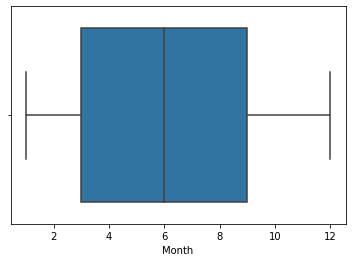

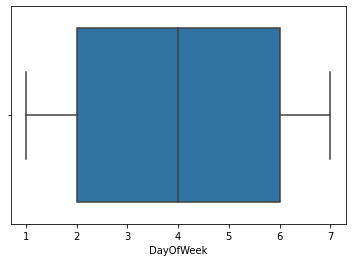

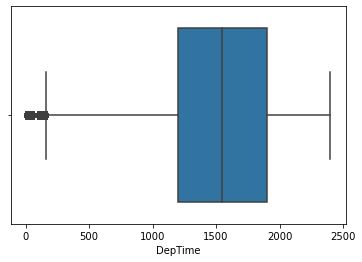

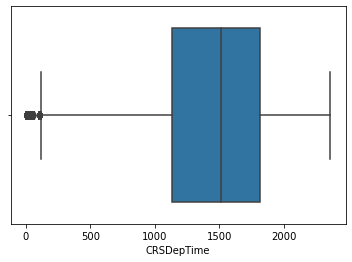

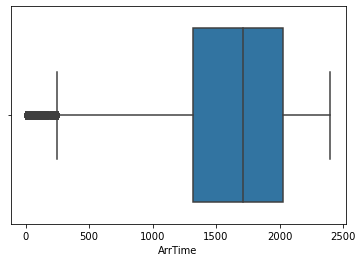

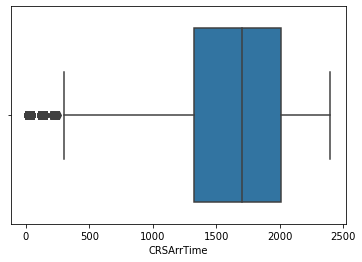

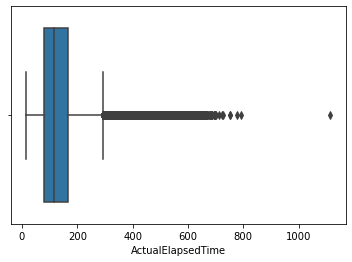

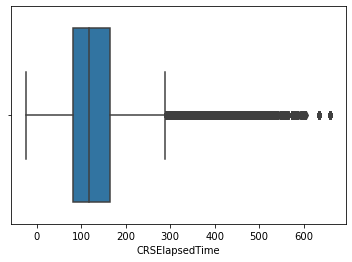

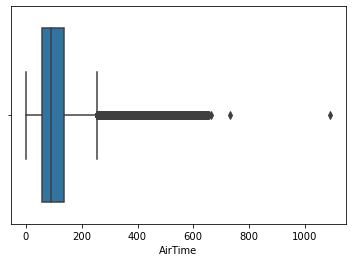

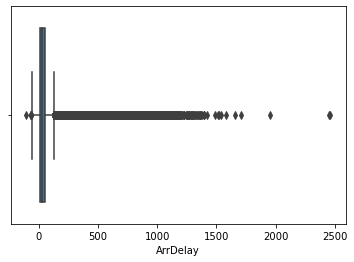

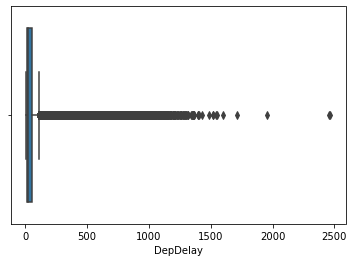

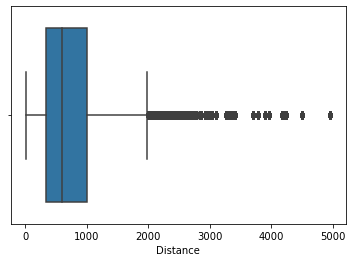

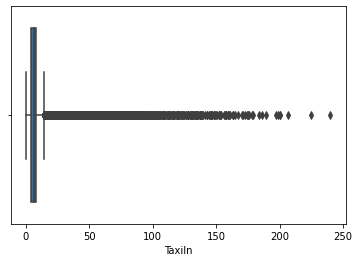

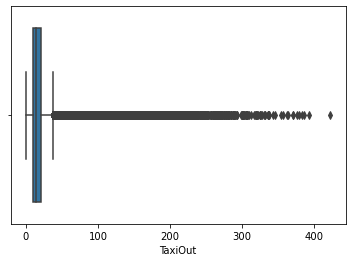

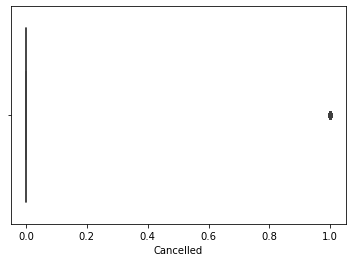

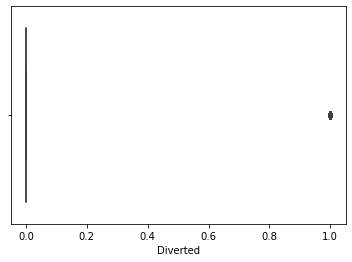

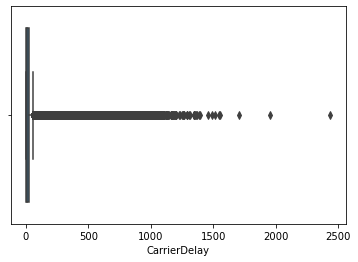

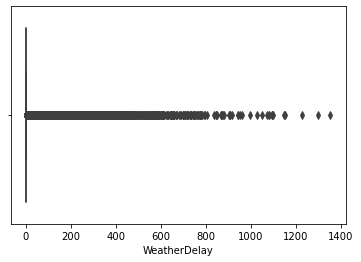

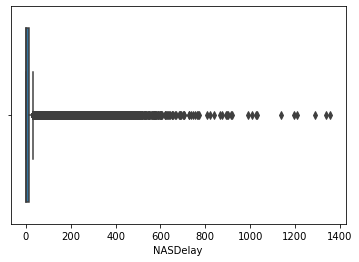

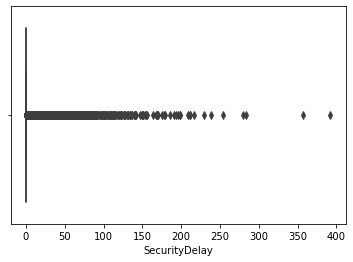

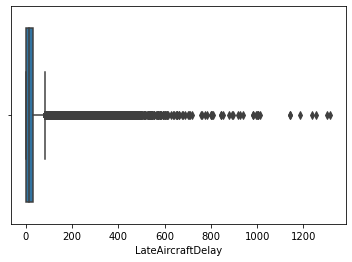

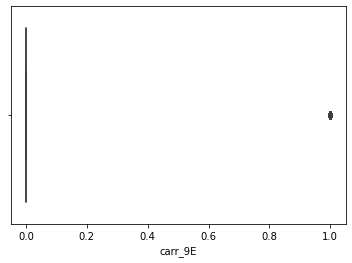

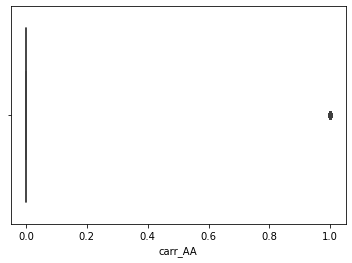

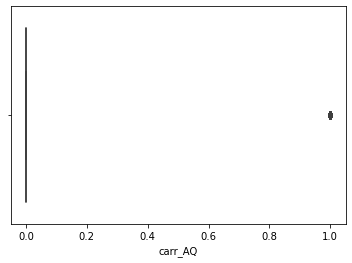

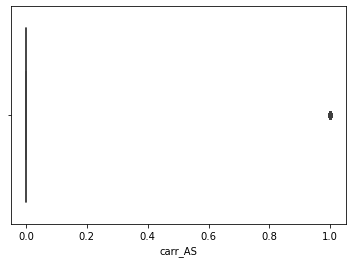

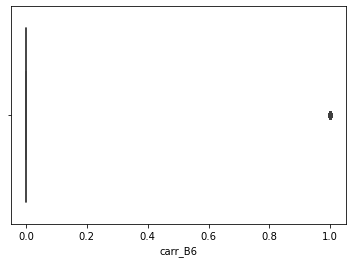

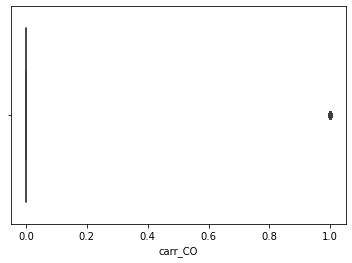

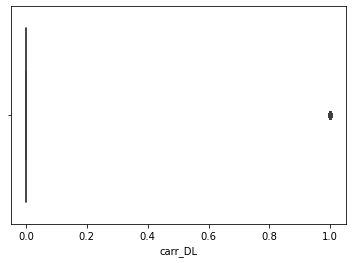

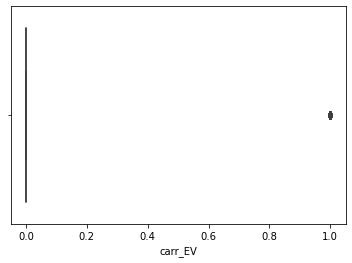

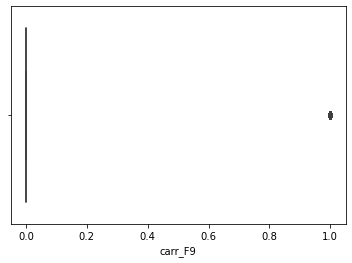

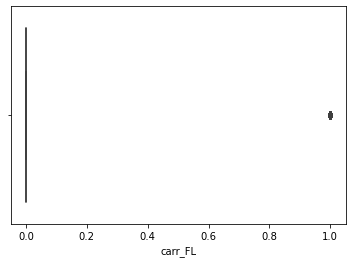

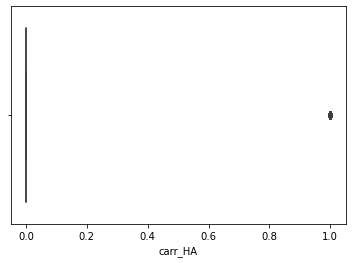

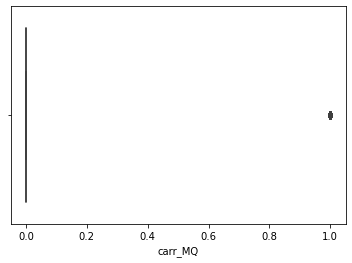

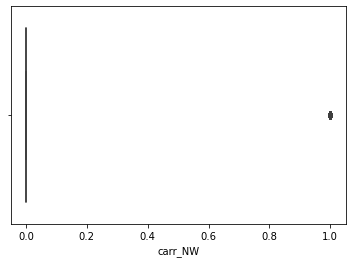

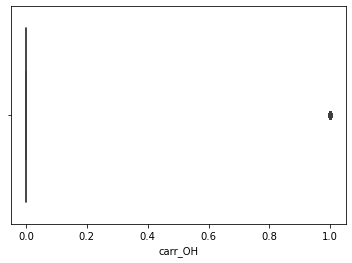

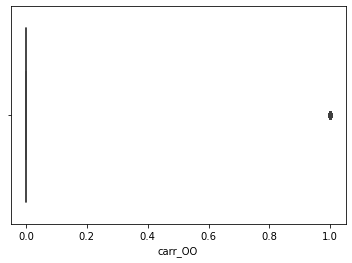

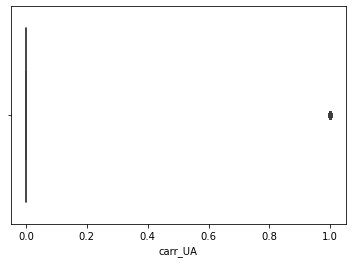

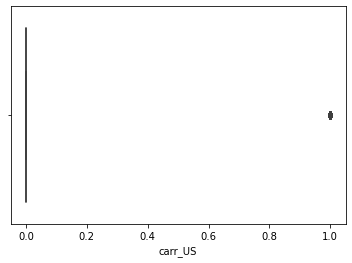

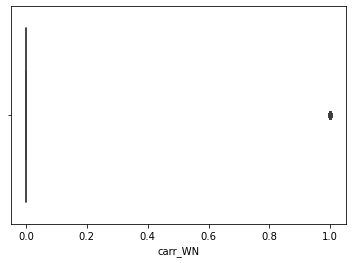

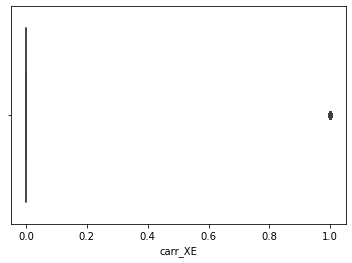

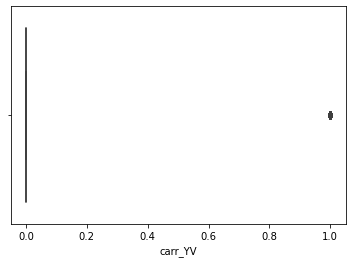

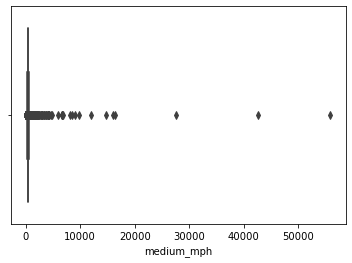

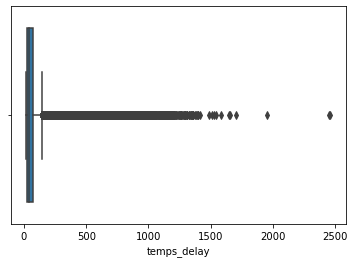

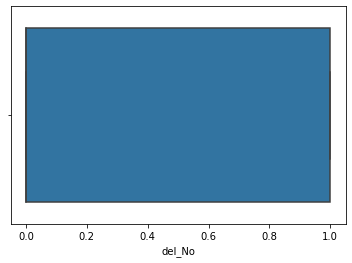

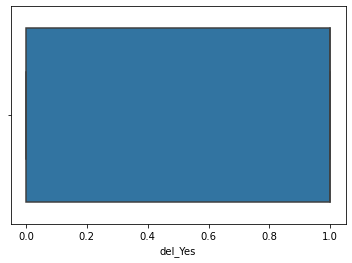

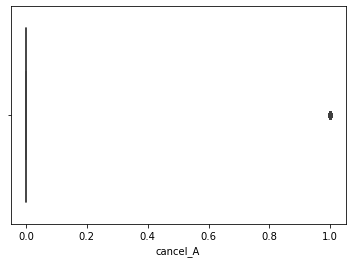

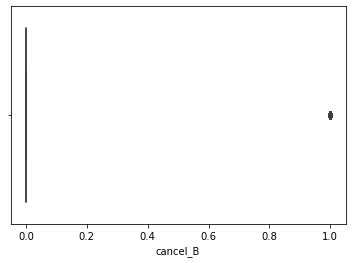

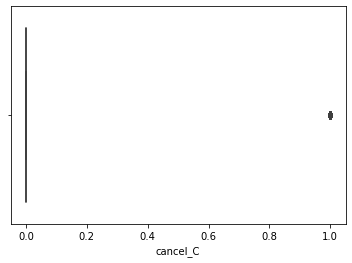

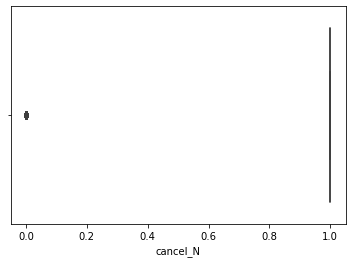

In [35]:
for i in df:
        plt.figure(figsize=(6,4))
        sns.boxplot(df[i])
        plt.show()

In [36]:
iqr(df)

19.0

In [38]:
df_2 = df[['Month', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 
        'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 
        'Distance', 'TaxiIn', 'TaxiOut','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
        'medium_mph', 'temps_delay']]

In [39]:
for i in df_2.columns:
    x = iqr(df_2[i])
    if x == 0:
        print(i)
    

WeatherDelay
SecurityDelay


In [40]:
col_0 = []
for i in df.columns:
    x = iqr(df[i])
    if x == 0:
        col_0.append(i)

In [41]:
col_0

['Cancelled',
 'Diverted',
 'WeatherDelay',
 'SecurityDelay',
 'carr_9E',
 'carr_AA',
 'carr_AQ',
 'carr_AS',
 'carr_B6',
 'carr_CO',
 'carr_DL',
 'carr_EV',
 'carr_F9',
 'carr_FL',
 'carr_HA',
 'carr_MQ',
 'carr_NW',
 'carr_OH',
 'carr_OO',
 'carr_UA',
 'carr_US',
 'carr_WN',
 'carr_XE',
 'carr_YV',
 'cancel_A',
 'cancel_B',
 'cancel_C',
 'cancel_N']

In [42]:
iqr(df_2)

381.0

In [43]:
Q1 = df_2.quantile(0.25)
Q3 = df_2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Month                  6.000000
DayOfWeek              4.000000
DepTime              697.000000
CRSDepTime           680.000000
ArrTime              714.000000
CRSArrTime           689.000000
ActualElapsedTime     85.000000
CRSElapsedTime        83.000000
AirTime               79.000000
ArrDelay              47.000000
DepDelay              41.000000
Distance             660.000000
TaxiIn                 4.000000
TaxiOut               11.000000
CarrierDelay          22.000000
WeatherDelay           0.000000
NASDelay              13.333333
SecurityDelay          0.000000
LateAircraftDelay     32.500000
medium_mph            96.231481
temps_delay           47.000000
dtype: float64


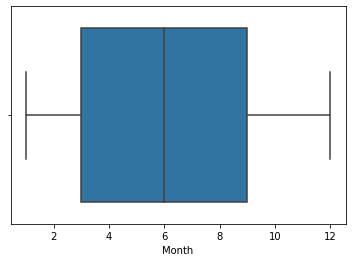

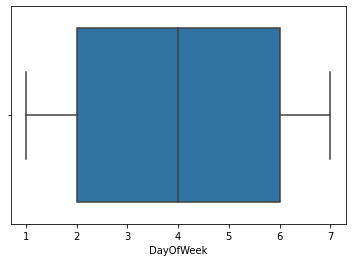

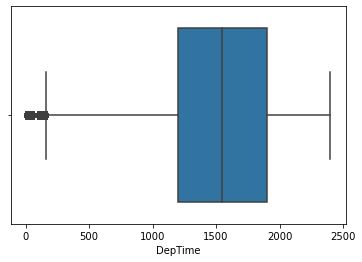

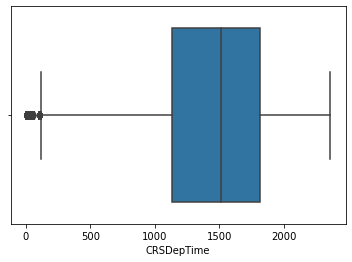

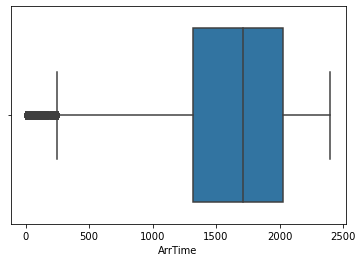

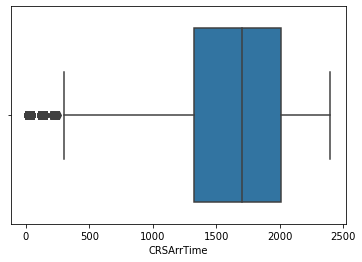

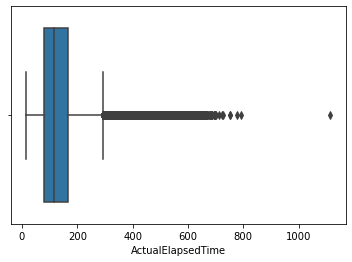

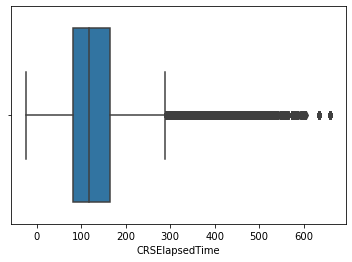

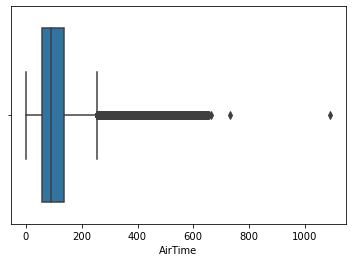

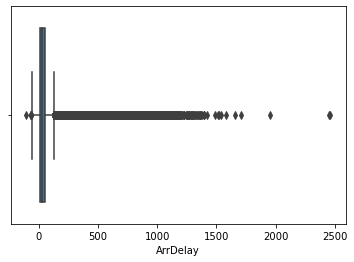

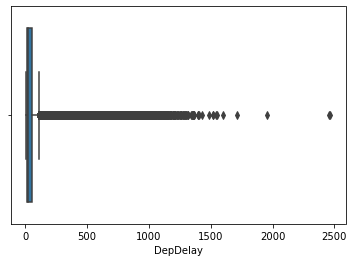

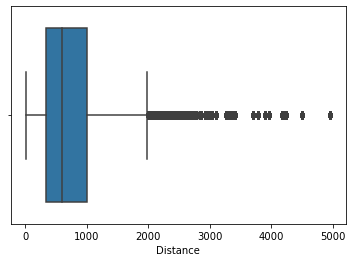

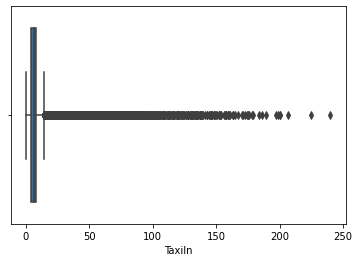

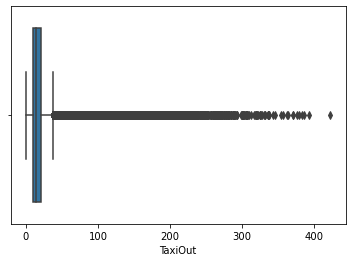

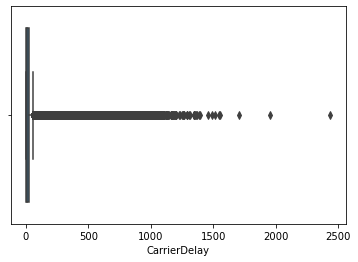

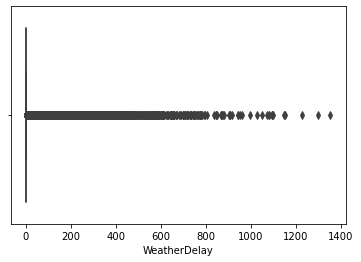

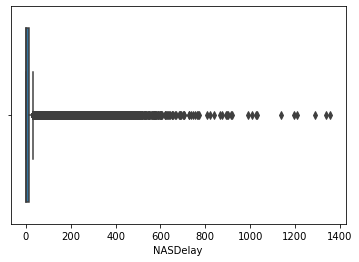

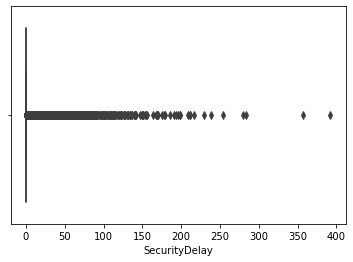

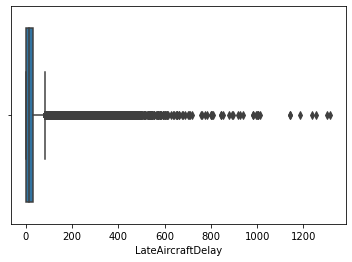

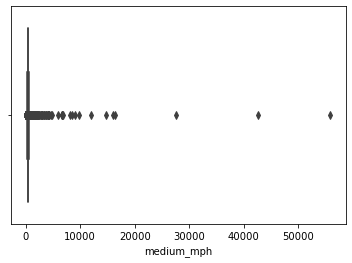

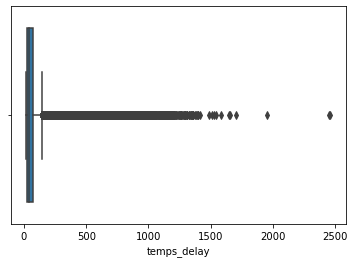

In [44]:
for i in df_2:
        plt.figure(figsize=(6,4))
        sns.boxplot(df_2[i])
        plt.show()

In [45]:
df_2.describe().transpose()

count         mean         std         min          25%          50%          75%     max
Month              1936758.0     6.111106    3.482546    1.000000     3.000000     6.000000     9.000000    12.0
DayOfWeek          1936758.0     3.984827    1.995966    1.000000     2.000000     4.000000     6.000000     7.0
DepTime            1936758.0  1518.534117  450.485255    1.000000  1203.000000  1545.000000  1900.000000  2400.0
CRSDepTime         1936758.0  1467.472644  424.766800    0.000000  1135.000000  1510.000000  1815.000000  2359.0
ArrTime            1936758.0  1610.115486  547.824619    1.000000  1316.000000  1715.000000  2030.000000  2400.0
CRSArrTime         1936758.0  1634.224641  464.634712    0.000000  1325.000000  1705.000000  2014.000000  2400.0
ActualElapsedTime  1936758.0   133.371183   72.056805   14.000000    80.000000   116.000000   165.000000  1114.0
CRSElapsedTime     1936758.0   134.301407   71.339262  -25.000000    82.000000   116.000000   165.000000   660.0
AirTime            1936758.0   108.330396   68.637493    0.000000    58.000000    90.000000   137.000000  1091.0
ArrDelay           1936758.0    42.260880   56.779532 -109.000000     9.000000    25.000000    56.000000  2461.0
DepDelay           1936758.0    43.185176   53.402502    6.000000    12.000000    24.000000    53.000000  2467.0
Distance           1936758.0   765.686159  574.479653   11.000000   338.000000   606.000000   998.000000  4962.0
TaxiIn             1936758.0     6.816336    5.274776    0.000000     4.000000     6.000000     8.000000   240.0
TaxiOut            1936758.0    18.233362   14.339260    0.000000    10.000000    14.000000    21.000000   422.0
CarrierDelay       1936758.0    19.003163   39.749607    0.000000     0.000000     6.000000    22.000000  2436.0
WeatherDelay       1936758.0     3.312984   19.042245    0.000000     0.000000     0.000000     0.000000  1352.0
NASDelay           1936758.0    13.562958   30.031298    0.000000     0.000000     2.500000    13.333333  1357.0
SecurityDelay      1936758.0     0.096008    1.892812    0.000000     0.000000     0.000000     0.000000   392.0
LateAircraftDelay  1936758.0    24.332213   37.889148    0.000000     0.000000    11.250000    32.500000  1316.0
medium_mph         1936758.0          inf         NaN   21.290323   351.910112   403.832335   448.141593     inf
temps_delay        1936758.0    60.307325   55.019325   15.000000    27.000000    43.000000    74.000000  2461.0

In [46]:
df_2['medium_mph'].describe()

count    1.936758e+06
mean              inf
std               NaN
min      2.129032e+01
25%      3.519101e+02
50%      4.038323e+02
75%      4.481416e+02
max               inf
Name: medium_mph, dtype: float64

In [48]:
df_2.drop(['WeatherDelay', 'SecurityDelay'], axis = 1, inplace = True)

In [49]:
df_2.skew()

Month                0.221201
DayOfWeek           -0.001300
DepTime             -0.409174
CRSDepTime          -0.226925
ArrTime             -1.060102
CRSArrTime          -0.715685
ActualElapsedTime    1.425701
CRSElapsedTime       1.440041
AirTime              1.494060
ArrDelay             3.940651
DepDelay             4.495078
Distance             1.545780
TaxiIn               5.998810
TaxiOut              4.501600
CarrierDelay         7.417562
NASDelay             5.277265
LateAircraftDelay    3.365440
medium_mph                NaN
temps_delay          4.199784
dtype: float64

In [50]:
# mirem perquè la columna 'medium_mph' ens retorna NaN al voler sabre el seu skew:
count = np.isinf(df_2).values.sum()
print("It contains " + str(count) + " infinite values")

It contains 7 infinite values


In [51]:
col_name = df_2.columns.to_series()[np.isinf(df_2).any()]
print(col_name)

medium_mph    medium_mph
dtype: object


In [52]:
r = df_2.index[np.isinf(df_2).any(1)]
print(r)

Int64Index([53543, 54342, 245633, 414132, 441835, 782761, 784702], dtype='int64')


In [53]:
df_2.replace([np.inf, -np.inf], np.nan, inplace=True)

In [54]:
df_2.skew()

Month                  0.221201
DayOfWeek             -0.001300
DepTime               -0.409174
CRSDepTime            -0.226925
ArrTime               -1.060102
CRSArrTime            -0.715685
ActualElapsedTime      1.425701
CRSElapsedTime         1.440041
AirTime                1.494060
ArrDelay               3.940651
DepDelay               4.495078
Distance               1.545780
TaxiIn                 5.998810
TaxiOut                4.501600
CarrierDelay           7.417562
NASDelay               5.277265
LateAircraftDelay      3.365440
medium_mph           157.310327
temps_delay            4.199784
dtype: float64

In [55]:
df_2.describe().transpose()

count         mean         std         min          25%          50%          75%      max
Month              1936758.0     6.111106    3.482546    1.000000     3.000000     6.000000     9.000000     12.0
DayOfWeek          1936758.0     3.984827    1.995966    1.000000     2.000000     4.000000     6.000000      7.0
DepTime            1936758.0  1518.534117  450.485255    1.000000  1203.000000  1545.000000  1900.000000   2400.0
CRSDepTime         1936758.0  1467.472644  424.766800    0.000000  1135.000000  1510.000000  1815.000000   2359.0
ArrTime            1936758.0  1610.115486  547.824619    1.000000  1316.000000  1715.000000  2030.000000   2400.0
CRSArrTime         1936758.0  1634.224641  464.634712    0.000000  1325.000000  1705.000000  2014.000000   2400.0
ActualElapsedTime  1936758.0   133.371183   72.056805   14.000000    80.000000   116.000000   165.000000   1114.0
CRSElapsedTime     1936758.0   134.301407   71.339262  -25.000000    82.000000   116.000000   165.000000    660.0
AirTime            1936758.0   108.330396   68.637493    0.000000    58.000000    90.000000   137.000000   1091.0
ArrDelay           1936758.0    42.260880   56.779532 -109.000000     9.000000    25.000000    56.000000   2461.0
DepDelay           1936758.0    43.185176   53.402502    6.000000    12.000000    24.000000    53.000000   2467.0
Distance           1936758.0   765.686159  574.479653   11.000000   338.000000   606.000000   998.000000   4962.0
TaxiIn             1936758.0     6.816336    5.274776    0.000000     4.000000     6.000000     8.000000    240.0
TaxiOut            1936758.0    18.233362   14.339260    0.000000    10.000000    14.000000    21.000000    422.0
CarrierDelay       1936758.0    19.003163   39.749607    0.000000     0.000000     6.000000    22.000000   2436.0
NASDelay           1936758.0    13.562958   30.031298    0.000000     0.000000     2.500000    13.333333   1357.0
LateAircraftDelay  1936758.0    24.332213   37.889148    0.000000     0.000000    11.250000    32.500000   1316.0
medium_mph         1936751.0   396.976523   97.631415   21.290323   351.910112   403.832335   448.141593  55920.0
temps_delay        1936758.0    60.307325   55.019325   15.000000    27.000000    43.000000    74.000000   2461.0

In [56]:
# Eliminem la columna de medium_mph ja que clarament no ens serveix, amb un valor mínim de 21mph i màxim de 55920mph:
df_2.drop(['medium_mph'], axis = 1, inplace = True)

In [57]:
# Quantile-based Flooring and Capping
low_list = []
high_list = []
for i in df_2.columns:
        x = df_2[i].quantile(0.15)
        low_list.append(x)
        y = df_2[i].quantile(0.85)
        high_list.append(y)

In [58]:
for count, i in enumerate(df_2.columns):
    df_2[i] = np.where(df_2[i] <low_list[count], low_list[count],df_2[i])
    df_2[i] = np.where(df_2[i] > high_list[count], high_list[count],df_2[i])

In [59]:
df_2.skew()

Month                0.203301
DayOfWeek           -0.246064
DepTime             -0.098505
CRSDepTime          -0.135708
ArrTime             -0.190518
CRSArrTime          -0.164661
ActualElapsedTime    0.382331
CRSElapsedTime       0.369521
AirTime              0.406490
ArrDelay             0.635072
DepDelay             0.735723
Distance             0.428443
TaxiIn               0.414612
TaxiOut              0.508119
CarrierDelay         0.789904
NASDelay             0.951129
LateAircraftDelay    0.667799
temps_delay          0.616955
dtype: float64

Determinant el 'terra' de les nostres dades amb el valor del seu 0.15 percentil, i el 'sostre' amb el valor del 0.85  
aconseguim una distribució normal (entre -1 i 1) de cada columna

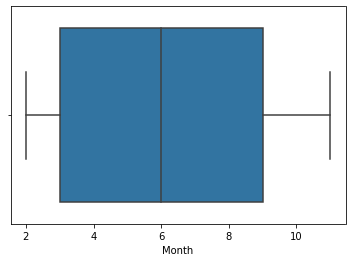

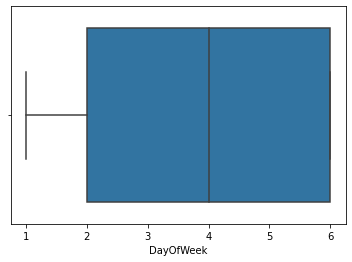

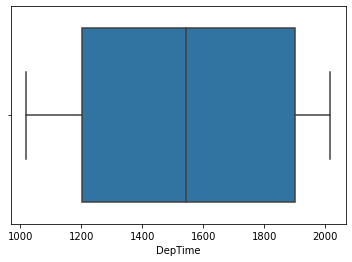

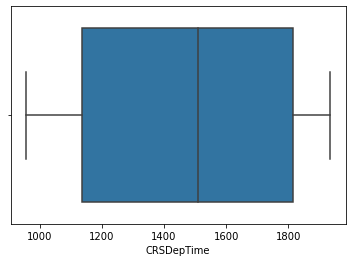

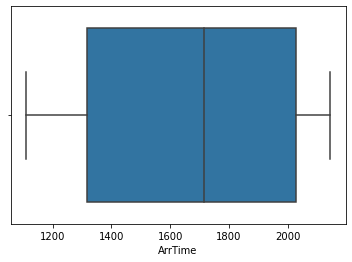

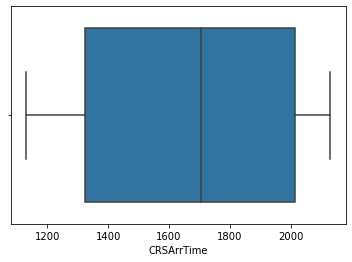

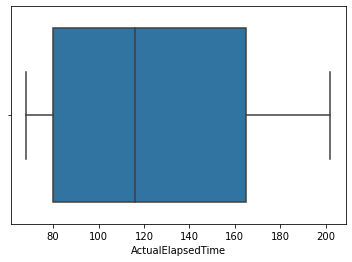

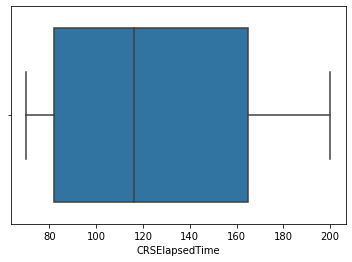

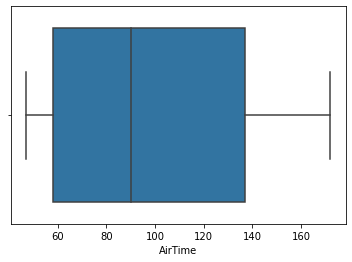

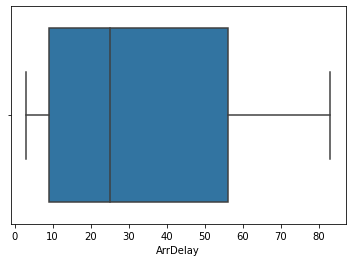

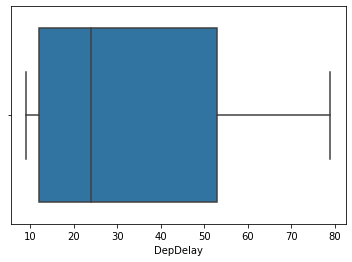

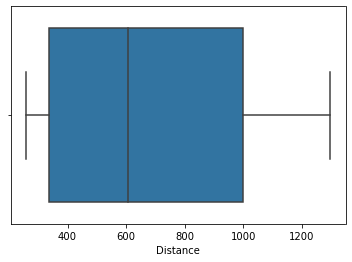

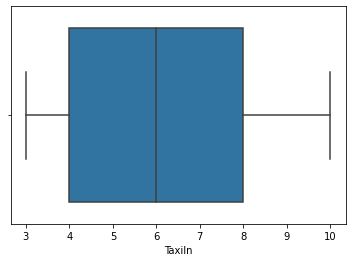

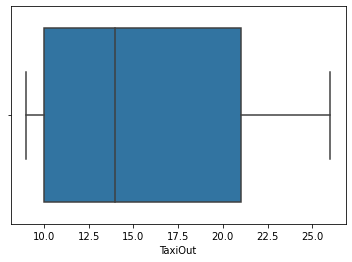

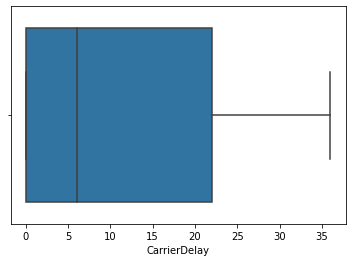

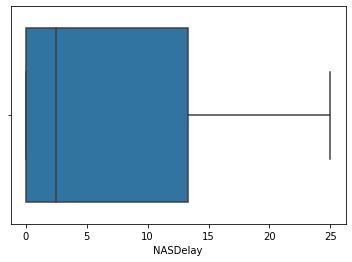

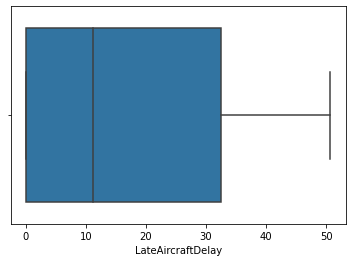

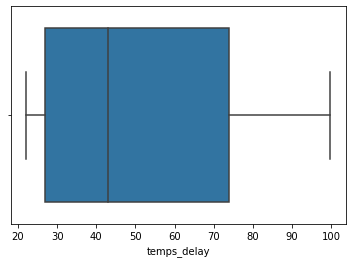

In [60]:
# Visualització de boxplots del variables després de limitar els outliers:
for i in df_2:
        plt.figure(figsize=(6,4))
        sns.boxplot(df_2[i])
        plt.show()

In [64]:
# Tornem a fer servir el filtre per detectar outliers:
z = np.abs(stats.zscore(df_2))
print(z)

[[1.28894483 0.09079532 1.29580424 ... 0.79689849 0.75352028 0.6375785 ]
 [1.28894483 0.09079532 1.42700871 ... 0.79689849 0.75352028 0.6375785 ]
 [1.28894483 0.09079532 1.42700871 ... 0.79689849 0.75352028 0.6375785 ]
 ...
 [1.53985768 1.20553534 1.42700871 ... 1.23530989 1.73320327 1.68661143]
 [1.53985768 1.20553534 0.78293215 ... 1.23530989 1.73320327 1.68661143]
 [1.53985768 1.20553534 1.17269522 ... 1.23530989 1.73320327 1.68661143]]


In [67]:
# No hi ha cap valor per sobre un zscore de 2:
outliers = np.where(z > 2)
outliers

(array([], dtype=int64), array([], dtype=int64))

In [70]:
# Estanderitzem les dades
x = StandardScaler().fit_transform(df_2)

In [71]:
df_2.columns

# Estandaritzem el df:
df_std = pd.DataFrame(data = x, columns = df_2.columns)

df_std

Month  DayOfWeek   DepTime  CRSDepTime   ArrTime  CRSArrTime  ActualElapsedTime  CRSElapsedTime   AirTime  ArrDelay  DepDelay  Distance    TaxiIn   TaxiOut  CarrierDelay  NASDelay  LateAircraftDelay  temps_delay
0       -1.288945   0.090795  1.295804    1.310101  1.271944    1.302670           0.061088        0.526505  0.365121 -1.080018 -0.992273  0.324508 -0.847818 -1.137908     -0.718740 -0.796898           0.753520    -0.637579
1       -1.288945   0.090795 -1.427009   -1.465770 -1.475706   -1.472053           0.061088        0.418848  0.297784 -1.080018 -0.598230  0.324508 -0.433652 -0.973326     -0.718740 -0.796898           0.753520    -0.637579
2       -1.288945   0.090795 -1.427009   -1.465770 -1.475706   -1.472053          -0.610010       -0.765375 -0.532697 -0.694185 -0.992273 -0.473952 -1.261985  0.178745     -0.718740 -0.796898           0.753520    -0.637579
3       -1.288945   0.090795  0.814820    0.800247  0.778640    0.736060          -0.735841       -0.765375 -0.510251  0.007329 -0.007165 -0.473952 -1.261985 -0.973326     -0.718740 -0.796898           0.753520    -0.637579
4       -1.288945   0.090795  1.121655    1.253450  1.208292    1.249897          -0.505151       -0.227092 -0.285797 -0.799412 -0.361804 -0.005702 -0.847818 -0.973326     -0.424051 -0.796898           1.147143    -0.226376
...           ...        ...       ...         ...       ...         ...                ...             ...       ...       ...       ...       ...       ...       ...           ...       ...                ...          ...
1936753  1.539858   1.205535 -0.785696   -0.715152 -0.128403   -0.299948           0.459553        0.569567  0.454902 -0.308352 -0.164782  0.584346  1.223015  0.343326     -0.645067 -0.796898           0.228690    -0.959389
1936754  1.539858   1.205535 -1.427009   -1.465770 -1.475706   -1.472053           0.040117       -0.356280 -0.487806  1.445432  0.899135 -0.565978  1.637182  1.659978     -0.866084  1.128352          -0.925936     0.828449
1936755  1.539858   1.205535 -1.427009   -1.465770 -1.369619   -1.472053           0.774130        0.375785  0.499793  1.726038  1.766031 -0.002996  0.808848  1.659978     -0.792412  1.235310           1.733203     1.686611
1936756  1.539858   1.205535 -0.782932   -0.658501 -0.581924   -0.619361          -0.211545       -0.184029 -0.240906 -0.869564 -0.913464 -0.425232  1.637182 -0.479582     -0.792412  1.235310           1.733203     1.686611
1936757  1.539858   1.205535 -1.172695   -1.046557 -0.669446   -0.672133          -0.043771        0.203535  0.095775 -1.080018 -0.992273  0.497734  0.808848 -0.808745     -0.792412  1.235310           1.733203     1.686611

[1936758 rows x 18 columns]

In [ ]:
# Nivell 3

# - Exercici 3
# Resumeix les noves columnes generades de manera estadística i gràfica

In [61]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True)
profile

Summarize dataset:   0%|          | 0/57 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [63]:
df.describe().transpose()

count         mean         std         min          25%          50%          75%     max
Month              1936758.0     6.111106    3.482546    1.000000     3.000000     6.000000     9.000000    12.0
DayOfWeek          1936758.0     3.984827    1.995966    1.000000     2.000000     4.000000     6.000000     7.0
DepTime            1936758.0  1518.534117  450.485255    1.000000  1203.000000  1545.000000  1900.000000  2400.0
CRSDepTime         1936758.0  1467.472644  424.766800    0.000000  1135.000000  1510.000000  1815.000000  2359.0
ArrTime            1936758.0  1610.115486  547.824619    1.000000  1316.000000  1715.000000  2030.000000  2400.0
CRSArrTime         1936758.0  1634.224641  464.634712    0.000000  1325.000000  1705.000000  2014.000000  2400.0
ActualElapsedTime  1936758.0   133.371183   72.056805   14.000000    80.000000   116.000000   165.000000  1114.0
CRSElapsedTime     1936758.0   134.301407   71.339262  -25.000000    82.000000   116.000000   165.000000   660.0
AirTime            1936758.0   108.330396   68.637493    0.000000    58.000000    90.000000   137.000000  1091.0
ArrDelay           1936758.0    42.260880   56.779532 -109.000000     9.000000    25.000000    56.000000  2461.0
DepDelay           1936758.0    43.185176   53.402502    6.000000    12.000000    24.000000    53.000000  2467.0
Distance           1936758.0   765.686159  574.479653   11.000000   338.000000   606.000000   998.000000  4962.0
TaxiIn             1936758.0     6.816336    5.274776    0.000000     4.000000     6.000000     8.000000   240.0
TaxiOut            1936758.0    18.233362   14.339260    0.000000    10.000000    14.000000    21.000000   422.0
Cancelled          1936758.0     0.000327    0.018076    0.000000     0.000000     0.000000     0.000000     1.0
Diverted           1936758.0     0.004004    0.063147    0.000000     0.000000     0.000000     0.000000     1.0
CarrierDelay       1936758.0    19.003163   39.749607    0.000000     0.000000     6.000000    22.000000  2436.0
WeatherDelay       1936758.0     3.312984   19.042245    0.000000     0.000000     0.000000     0.000000  1352.0
NASDelay           1936758.0    13.562958   30.031298    0.000000     0.000000     2.500000    13.333333  1357.0
SecurityDelay      1936758.0     0.096008    1.892812    0.000000     0.000000     0.000000     0.000000   392.0
LateAircraftDelay  1936758.0    24.332213   37.889148    0.000000     0.000000    11.250000    32.500000  1316.0
carr_9E            1936758.0     0.026790    0.161468    0.000000     0.000000     0.000000     0.000000     1.0
carr_AA            1936758.0     0.099065    0.298749    0.000000     0.000000     0.000000     0.000000     1.0
carr_AQ            1936758.0     0.000387    0.019675    0.000000     0.000000     0.000000     0.000000     1.0
carr_AS            1936758.0     0.020288    0.140984    0.000000     0.000000     0.000000     0.000000     1.0
carr_B6            1936758.0     0.028561    0.166568    0.000000     0.000000     0.000000     0.000000     1.0
carr_CO            1936758.0     0.051733    0.221488    0.000000     0.000000     0.000000     0.000000     1.0
carr_DL            1936758.0     0.058984    0.235595    0.000000     0.000000     0.000000     0.000000     1.0
carr_EV            1936758.0     0.042275    0.201217    0.000000     0.000000     0.000000     0.000000     1.0
carr_F9            1936758.0     0.014596    0.119929    0.000000     0.000000     0.000000     0.000000     1.0
carr_FL            1936758.0     0.036806    0.188285    0.000000     0.000000     0.000000     0.000000     1.0
carr_HA            1936758.0     0.003867    0.062067    0.000000     0.000000     0.000000     0.000000     1.0
carr_MQ            1936758.0     0.073277    0.260591    0.000000     0.000000     0.000000     0.000000     1.0
carr_NW            1936758.0     0.040846    0.197932    0.000000     0.000000     0.000000     0.000000     1.0
carr_OH            1936758.0     0.027188    0.162632    0.000000   

Ara visualitzem i resumim estadísticament el df al qual hem retirat les columnes del one hot encoding  
per limitar els outliers i estanderitzar les dades

In [73]:
profile = ProfileReport(df_std, minimal=True)
profile

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Falta estandaritzar a l'exercici 2:
# - Què fer amb les columnes que tenen poca informació però potencialment rellevant (molts 0 i poca info),
# com weather delay o security delay?
# - Revisar aquest mètode d'estandarització perquè queden totes les variables en forma de caixa.

# La imputació de nulls amb interpolate no sé si està bé. --> La deixem, està bé per provar
# Què vol dir polinomis a l'exercici 2? Vol dir crear nous features? --> Deixar de banda.
# --> NO CAL FER FEATURE SELECTION en aquesta tasca. Només afegir, transformar, descriure i visualitzar